# DO THIS BEFORE ANYTHING ELSE
Go to the menu bar above and click `File -> Make a copy...`.

Then rename that copy to something unique. You can rename with `File -> Rename ...`.

In [1]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import utils
import matplotlib.pyplot as plt
from sklearn import datasets

# WAIT! Did you make a copy?
Ok, then we can move on.

# Demystifying Machine Learning

Machine Learning is just a catchy way of saying "Methods that can update their internal parameters based on obervations". And that is just a fancy way of saying "Fit a model to the data"

## Load some example data

There is a bunch of classic datasets. One that is used a lot is the Iris dataset. It is measurements of 3 types of flowers: Iris Setosa, Iris Viginica and Iris Versicolor. 

In [2]:
iris = datasets.load_iris()

In [3]:
utils.show_flowers()

Iris virginica


Iris setosa


Iris versicolor


In [4]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

What does the data look like?

In [5]:
print(iris.data[0])
print(iris.target[0])

[ 5.1  3.5  1.4  0.2]
0


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [7]:
X = iris.data
y = iris.target

## You try
Try to plot the different dimensions against each other.

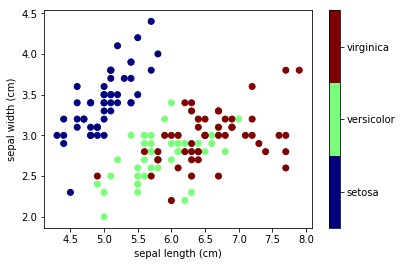

In [8]:
utils.plot_2d(0,1, iris)

## Make a simple model

Now, we are getting to the Machine Learning part. 
Lets build a model that predicts the species from the neighboring points

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
model = KNeighborsClassifier(n_neighbors=5)

In [11]:
# We can get the help function by appending '?' to an object
# KNeighborsClassifier?

In [12]:
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
example_point = [[3, 5, 4, 2],]
model.predict(example_point)

array([1])

In [14]:
model.predict_proba(example_point)

array([[ 0. ,  0.8,  0.2]])

### Visualizing the model

In [15]:
idx1 = 0
idx2 = 1
X_cut = X[:,[idx1, idx2]]

In [16]:
model.fit(X_cut, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

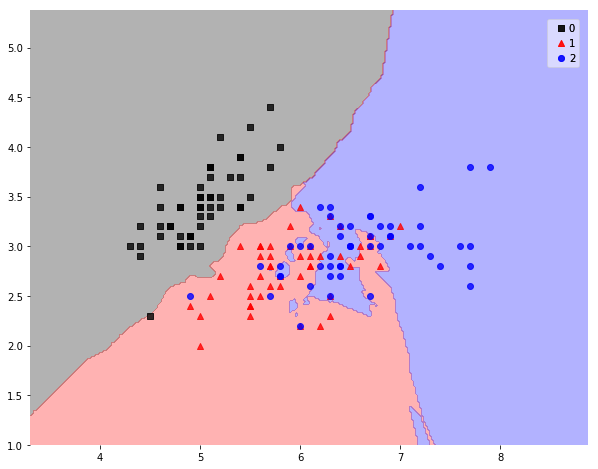

In [17]:
fig = plt.figure(figsize=(10,8))
utils.plot_decision_regions(X_cut, y, clf=model)

### PCA
PCA notes: http://setosa.io/ev/principal-component-analysis/

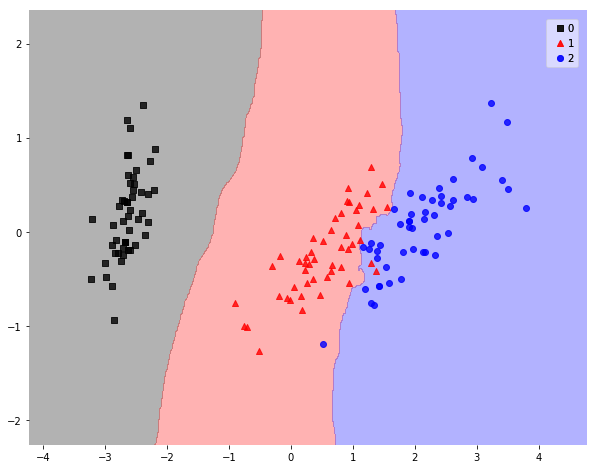

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_t = pca.fit_transform(X)
model.fit(x_t, y)
fig = plt.figure(figsize=(10,8))

utils.plot_decision_regions(x_t, y, model)

### Evaulate the model
Let's look at the accuracy of our predictions

In [19]:
utils.evaulate_model(model)

This model got 0.987 +- 0.00924 accuracy


# Now you try!
Who can get the best accuracy?

You can try `SVC` for example. Remember to try different hyperparameters.

(You can even try `sklearn.ensemble.RandomForestClassifier` if you are feeling adventurous)

In [20]:
from sklearn.svm import SVC
model = SVC()

# Handwritten digits
Let's look at the range of stuff we can do

In [21]:
digits = datasets.load_digits()

In [22]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

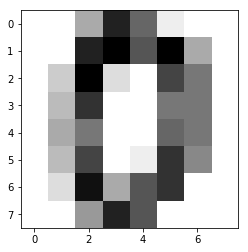

In [23]:
img = digits.images[0]
plt.imshow(img, cmap=plt.cm.binary)

## Look at the raw data

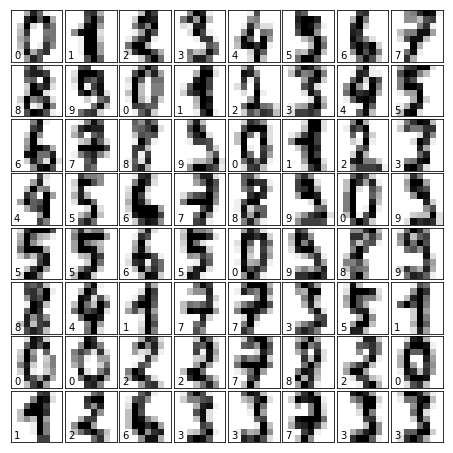

In [24]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

## Decision Tree

In [25]:
from IPython.core.display import Image, display
display(Image(url='http://i.imgur.com/LmiDFrR.png'))

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
X = digits.data
y = digits.target

How good is this model?

In [27]:
utils.evaulate_model(model, X=X, y=y)

This model got 0.775 +- 0.0267 accuracy


### Can we do better?
How about many decision trees?

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [29]:
utils.evaulate_model(model, X=X, y=y)

This model got 0.943 +- 0.0145 accuracy


# High dim data

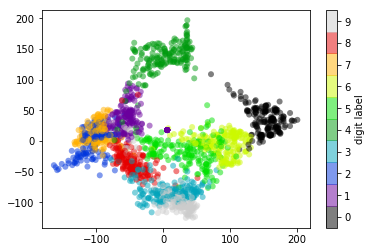

In [30]:
from sklearn.manifold import TSNE, Isomap
iso = Isomap(n_components=2)
data_projected = iso.fit_transform(digits.data)
utils.visualize_digits(data_projected, labels=digits.target)

In [31]:
model.fit(data_projected, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

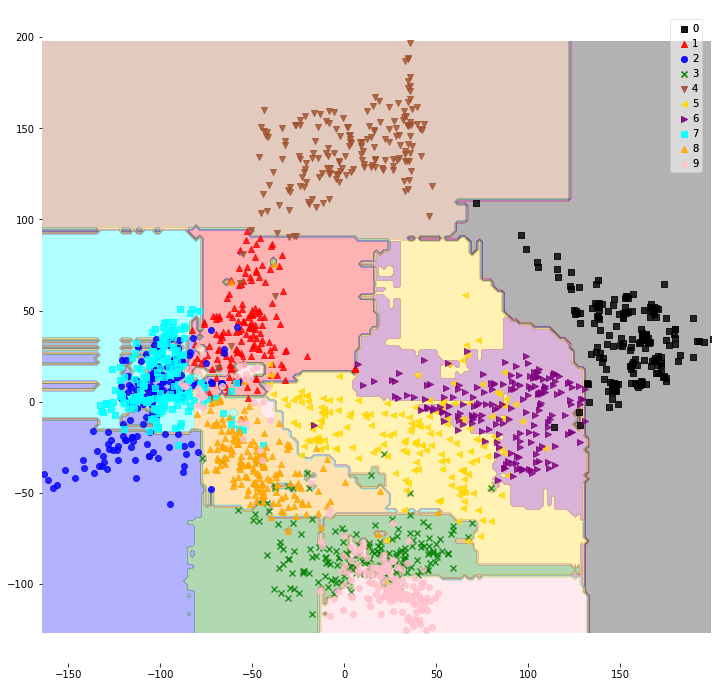

In [32]:
fig = plt.figure(figsize=(12,12))
utils.plot_decision_regions(data_projected, y, model, res=2)